# [*Lab Project Part 2*]() CNNs for Image Classification
------------------------------

### General Guideline
1. Aim:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning framework(Pytorch).*
2. Prerequisite:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*

### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known  

## Session 1: Image Classifiation on CIFAR 10
### Install pytorch and run the given codes

In [1]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import os
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified


####  *` Q2.1: test dataloader and show the images of each class  of CIFAR10`*  

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

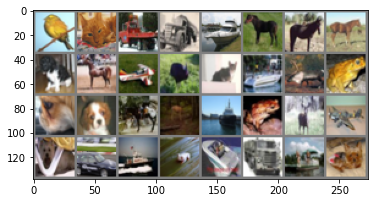

 bird   cat truck truck


In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

####  *` Q2.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet.`*  

In [5]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        super(TwolayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        # flatten
        x = x.view(x.shape[0], -1)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores


In [6]:
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self, n_classes):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1)
        self.pool1 = nn.AvgPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        self.lin1 = nn.Linear(in_features=120, out_features=84)
        self.lin2 = nn.Linear(in_features=84, out_features=n_classes)
        
    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = torch.tanh(self.conv2(self.pool1(x)))
        x = torch.tanh(self.conv3(self.pool2(x)))
        x = torch.flatten(x, 1)
        x = torch.tanh(self.lin1(x))
        scores = self.lin2(x)
        #probs = F.softmax(logits, dim=1)
        return scores

In [7]:
def train(net, trainloader, epoch=1):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(),lr=0.0003) 
    
    epoch_losses = []
    for ep in range(epoch):  
        print('Now starting epoch {}'.format(ep+1))
        epoch_loss = 0
        i = 0
        for (x, y) in tqdm(trainloader): 
            i += 1
            
            outputs = net(x)
            loss = criterion(outputs, y)
            epoch_loss += loss.item()

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print('Epoch loss was {0:1.2f}'.format(epoch_loss/(i)))
        epoch_losses.append(epoch_loss/(i))
    
    plt.title('Learning Curve for {}'.format(type(net).__name__))
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    plt.plot(np.arange(1,epoch+1,1),epoch_losses,label="train")
    plt.legend()
    plt.show()
    print('Finished Training')

####  Train Two-layer Net

In [8]:
twolayernet = TwolayerNet((3*32*32), 20, 10)
train(twolayernet, trainloader, epoch=10)

  0%|          | 0/1563 [00:00<?, ?it/s]

Now starting epoch 1


  7%|▋         | 102/1563 [00:01<00:19, 73.40it/s]


KeyboardInterrupt: 

#### Train ConvNet

In [ ]:
convnet = ConvNet(10)
train(convnet, trainloader, epoch=10)

In [9]:
def valid(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

In [10]:
def valid_class(net,testloader,classes):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

####  *` Q2.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.`*  

#### *` Complement  CIFAR10_loader()`*

In [14]:
###  suggested reference: https://pytorch.org/tutorials/
# recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import pickle

class CIFAR10_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        
        ###
        
        # load data from file
        if train:
            for i in range(1,6):
                
                print('Now loading data from batch {}'.format(i))
                f = open(root+'data_batch_{}'.format(i), 'rb')
                new_data = pickle.load(f, encoding='latin1')
                new_data.pop('batch_label', None)
                new_data.pop('filenames', None)
                new_data['data'] = list(new_data['data'])
                f.close()
                
                
                # save data in data frame
                if i==1:
                    data = new_data
                else:
                    data['labels'].extend(new_data['labels'])
                    data['data'].extend(new_data['data'])
        
        else:
            f = open(root+'test_batch', 'rb')
            data = pickle.load(f, encoding='latin1')
            data.pop('batch_label', None)
            data.pop('filenames', None)
            data['data'] = list(new_data['data'])
            f.close()
        
        self.data = pd.DataFrame.from_dict(data)
        # save path to file
        self.root = root
        
        # save transformation for getitem
        self.transform = transform
        
        ###

    def __len__(self):
        return len(self.data['data'])

    def __getitem__(self, item):
        
        ###
        
        # get image and label
        img = self.data.loc[item,'data']/255.0
        target = self.data.loc[item, 'labels']
        
        
        img = torch.Tensor(img.reshape(3,32,32))
        target = torch.tensor(target, dtype=torch.int64)
        
        # apply transformation on data set
        if self.transform:
            img = self.transform(img)
           
        ###
        
        return img, target

      
        

#path = "./data/cifar-10-batches-py/"
#dataset = CIFAR10_loader(path) 


#### *` Complement Transform function and Optimizer`*

In [12]:
transform_train = transforms.Compose([transforms.ToPILImage(), transforms.RandomAffine(90), transforms.ToTensor()]) # random affine transformation in range (-90, +90) degree

transform_test = None#transforms.Compose([transforms.ToPILImage(), transforms.RandomAffine(90), transforms.ToTensor()])

optimizer = optim.Adam

#### *` Train the ConvNet with CIFAR10_loader, transform and optimizer you implemented and compare the results`*

In [11]:
def train(net, trainloader, epoch=1, plotpath='./plots/latest_plot.pdf'):
    ###################### Define Loss function and optimizer
    
    ###
    
    # set up optimizer and loss function
    opt = optimizer(net.parameters(), lr=3e-4)
    criterion = nn.CrossEntropyLoss()
    
    ###
    
    ############################### Training
    
    epoch_losses = []
    
    for ep in range(epoch):  # loop over the dataset multiple times 

        ################################
         
        print('Now starting epoch {}'.format(ep+1))
        wa
        epoch_loss = 0
        i = 0
        for (x, y) in tqdm(trainloader): 
            i += 1
            # forwards
            outputs = net(x)
            
            # compute loss
            loss = criterion(outputs, y)
            epoch_loss += loss.item()

            # Backward and optimize
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        print('Epoch loss was {0:1.2f}'.format(epoch_loss/i))
        epoch_losses.append(epoch_loss/i)
        ################################

    #plt.title('Learning Curve for {}'.format(type(net).__name__))
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy Loss')
    
    plt.plot(np.arange(1,epoch+1,1),epoch_losses,label="train")
    plt.legend()
    plt.savefig(plotpath)
    print('Finished Training')
    


In [12]:
################################
# Todo: finish the code
################################
cifar_path = './data/cifar-10-batches-py/'

epochs = 10   

In [ ]:
# Training Two Layer Net
two_layer_net = TwolayerNet((3*32*32), 20, 10)

print('Now training Two Layer Net')

    
# set up dataset and loader
transformed_dataset = CIFAR10_loader(cifar_path, transform = transform_train)
trainloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)
    
# train
train(two_layer_net, trainloader, epoch=epochs)

In [ ]:
# Training ConvNet
conv_net = ConvNet(10)

for i in range(5):
    print('Now training on batch {}'.format(i+1))
    
    # set up dataset and loader
    transformed_dataset = CIFAR10_loader(batch_files[i], transform = transform_train)
    trainloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)
    
    # train on the batch
    train(conv_net, trainloader, epoch=epoch_per_batch)

# save conv net
torch.save(conv_net.state_dict(), './models/conv_net_cifar.pt')

#### *` Q2.4 Setting up the hyperparameters.`*

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [78]:
################################
# Todo: finish the code
################################
epochs = 10   

# Training Two Layer Net
two_layer_net = TwolayerNet((3*32*32), 20, 10)

print('Now training Two Layer Net')

    
# set up dataset and loader
transformed_dataset = CIFAR10_loader(cifar_path, transform = transform_train)
trainloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)
    
# train
train(two_layer_net, trainloader, epoch=epochs)

In [23]:
# Training ConvNet
conv_net = ConvNet(10)

for i in range(5):
    print('Now training on batch {}'.format(i+1))
    
    # set up dataset and loader
    transformed_dataset = CIFAR10_loader(batch_files[i], transform = transform_train)
    trainloader = DataLoader(transformed_dataset, batch_size=32, shuffle=True)
    
    # train on the batch
    train(conv_net, trainloader, epoch=epoch_per_batch)

# save conv net
torch.save(conv_net.state_dict(), './models/conv_net_cifar.pt')

Now training on batch 1
Now starting epoch 1
Epoch loss was 2.10
Now starting epoch 2
Epoch loss was 1.97
Now starting epoch 3
Epoch loss was 1.93
Finished Training
Now training on batch 2
Now starting epoch 1
Epoch loss was 1.93
Now starting epoch 2
Epoch loss was 1.90
Now starting epoch 3
Epoch loss was 1.88
Finished Training
Now training on batch 3
Now starting epoch 1
Epoch loss was 1.83
Now starting epoch 2
Epoch loss was 1.82
Now starting epoch 3
Epoch loss was 1.81
Finished Training
Now training on batch 4
Now starting epoch 1
Epoch loss was 1.82
Now starting epoch 2
Epoch loss was 1.80
Now starting epoch 3
Epoch loss was 1.78
Finished Training
Now training on batch 5
Now starting epoch 1
Epoch loss was 1.79
Now starting epoch 2
Epoch loss was 1.78
Now starting epoch 3
Epoch loss was 1.76
Finished Training


#### *` test the accuracy of ConvNet `*

In [14]:
################################
# Todo: finish the code
################################

# load data
test_path = './data/cifar-10-batches-py/test_batch'
transformed_test_dataset = CIFAR10_loader(test_path, transform=transform_test, train=False)
testloader = DataLoader(transformed_test_dataset, batch_size=32, shuffle=True)



In [139]:
# evaluate ConvNet
valid(conv_net, testloader)


Accuracy of the network on the 10000 test images: 38 %


#### *`test the accuracy of TwolayerNet`*

In [140]:
################################
# Todo: finish the code
################################

valid(two_layer_net, testloader)


Accuracy of the network on the 10000 test images: 28 %


## Session 2:  Finetuning the ConvNet
### STL-10 DATASET
> The provided network is trained on a different dataset named CIFAR-10 4 , which
contains the images of 10 different object categories, each of which has 32 ∗ 32 ∗ 3
dimensions. The dataset we use throughout the assignment is a subset of STL-10 5
with larger sizes and different object classes. So, there is a discrepancy between the
dataset we use to train (CIFAR-10) and test (STL-10) our network. One solution
would be to train the whole network from scratch. However, the number of param-
eters are too large to be trained properly with such few number of images provided.
One solution is to shift the learned weights in a way to perform well on the test
set, while preserving as much information as necessary from the training class.
### In this Session, extract 5 classes from STL training dataset , 
the the label of images can be defined as `{1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}`

#### *`Q3.1 create the STL10_Dataset `*

In [15]:
#from stl10_data import *
from PIL import Image

class STL10_Dataset(Dataset):
    def __init__(self,root,train=True,transform = None):
        ################################
        '''
        root - str, root dir which contains all classes
        '''
        
        # extract data from files
        image_data = []
        labels = []
        
        # for all classes
        for i in range(1,6):
            path = root + str(i) + '/'
        
            # get list of all filenames
            (_, _, files) = next(os.walk(path))
            files = [path + file for file in files]
            
            # load all images in the folder
            for file in files:
                file_data = np.array(Image.open(file))
                
                image_data.append(file_data)
                labels.append(i-1)
        
        # save in dataframe
        self.data =  pd.DataFrame(data={'data':image_data, 'labels':labels})
        
        # save path to dir
        self.root = root
        
        # save transformation for getitem
        self.transform = transform
        
        ################################

 

    def __len__(self):
        ################################
        
        return len(self.data)
        ################################
        

    def __getitem__(self, item):
        ################################
        
        # get image and label
        img = self.data.loc[item,'data']/255.0
        target = self.data.loc[item, 'labels']

        img = torch.Tensor(img.reshape(3,96,96))
        target = torch.tensor(target, dtype=torch.int64)
        
        # apply transformation on data set
        if self.transform:
            img = self.transform(img)
        
        ################################

        return img, target

#root = './data/part2/test/'
#stl_data = STL10_Dataset(root)
#print(len(stl_data))
#print(stl_data[3][0])

#### *`Q3.2  Finetuning from ConvNet & train the model and show the results`*

In [16]:
# set up data

# trafo needed for size compatibility
#trafos = transforms.Compose([transforms.ToPILImage(), transforms.Resize(32), transforms.ToTensor()])
trafos = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])

# load data
stl_train = STL10_Dataset('./data/part2_stl/train/', transform=trafos)
stl_train_loader = DataLoader(stl_train, batch_size=32, shuffle=True)
stl_test = STL10_Dataset('./data/part2_stl/test/', transform=trafos)
stl_test_loader = DataLoader(stl_test, batch_size=32, shuffle=True)


  1%|▏         | 1/79 [00:00<00:10,  7.39it/s]

Now starting epoch 1


  3%|▎         | 2/79 [00:00<00:05, 13.18it/s]

Epoch loss was 2.49
Now starting epoch 2


  3%|▎         | 2/79 [00:00<00:06, 11.81it/s]

Epoch loss was 1.58
Now starting epoch 3


  3%|▎         | 2/79 [00:00<00:05, 14.21it/s]

Epoch loss was 1.49
Now starting epoch 4


  1%|▏         | 1/79 [00:00<00:08,  9.06it/s]

Epoch loss was 1.46
Now starting epoch 5


  3%|▎         | 2/79 [00:00<00:05, 13.31it/s]

Epoch loss was 1.46
Now starting epoch 6


  3%|▎         | 2/79 [00:00<00:05, 12.88it/s]

Epoch loss was 1.46
Now starting epoch 7


  1%|▏         | 1/79 [00:00<00:08,  9.28it/s]

Epoch loss was 1.43
Now starting epoch 8


  3%|▎         | 2/79 [00:00<00:05, 13.21it/s]

Epoch loss was 1.44
Now starting epoch 9


  3%|▎         | 2/79 [00:00<00:06, 11.58it/s]

Epoch loss was 1.42
Now starting epoch 10


100%|██████████| 79/79 [00:07<00:00, 10.52it/s]


Epoch loss was 1.43
Finished Training


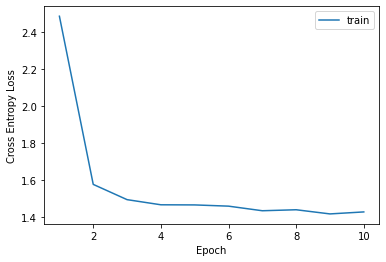

In [110]:
################################

# Make sure you trained ConvNet above at least once before executing this cell!

# set up conv net
conv_net_stl = ConvNet(10)

# load old params and freeze them
conv_net_stl.load_state_dict(torch.load('./models/conv_net_cifar.pt'))
for param in conv_net_stl.parameters():
    param.requires_grad = False

# replace last layer to adjust for different number of classes
# this layer will be re-trained
conv_net_stl.lin1 = nn.Linear(in_features=34680, out_features=84)
conv_net_stl.lin2 = nn.Linear(in_features=84, out_features=5)

# train params
epochs = 10

# train
train(conv_net_stl, stl_train_loader, epoch=epochs, plotpath='./plots/stl_finetuned.pdf')
torch.save(conv_net_stl.state_dict(), './models/conv_net_stl.pt')
################################

Accuracy of the network on the 10000 test images: 38 %


RuntimeError: size mismatch, m1: [32 x 34680], m2: [120 x 84] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:41

#### *`Q3.3  Feature Space Visualization`*

In [17]:
################################
# code partly inspired from https://www.learnopencv.com/t-sne-for-feature-visualization/

from sklearn.manifold import TSNE


# set up conv_net CIFAR
conv_cifar = ConvNet(10)
conv_cifar.load_state_dict(torch.load('./models/conv_net_cifar.pt'))
conv_cifar.eval()

# get output dim for last conv layer
out_dim = 34680


def get_features(net, img):
    
    # pass through the conv layers
    x = torch.tanh(net.conv1(img))
    x = torch.tanh(net.conv2(net.pool1(x)))
    x = torch.tanh(net.conv3(net.pool2(x)))
    x = torch.flatten(x, 1)
    
    return x

In [19]:
outputs = []
labels = []

i = 0
for (img, label) in tqdm(stl_test_loader):
    
    i += 1
    if i%2 == 0: # skip half the images, because of memory issues with storing them all
        continue
        
    with torch.no_grad():
        out = get_features(conv_cifar, img).tolist()
    outputs.extend(out)    
    labels.extend(label.tolist())
    
labels = np.array(labels).reshape((-1))
outputs = np.array(outputs).reshape((-1,out_dim))
outputs_embedded = TSNE(n_components=2, verbose=1).fit_transform(outputs)
################################

100%|██████████| 125/125 [00:09<00:00, 13.43it/s]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2016 samples in 8.450s...
[t-SNE] Computed neighbors for 2016 samples in 395.601s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2016
[t-SNE] Computed conditional probabilities for sample 2000 / 2016
[t-SNE] Computed conditional probabilities for sample 2016 / 2016
[t-SNE] Mean sigma: 20.169401
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.364746
[t-SNE] KL divergence after 1000 iterations: 1.640684


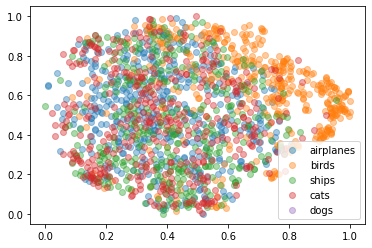

In [28]:
# get x and y coordinates
tx = outputs_embedded[:,0]
ty = outputs_embedded[:,1]

tx -= np.min(tx)
ty -= np.min(ty)

tx /= np.max(tx)
ty /= np.max(ty)

# class labels for plot legend
classes = {1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}

# plot tsne features
plt.figure()
for i in range(1,6):
    plt.scatter(tx[labels==i], ty[labels==i], label=classes[i], alpha=0.4)
plt.legend()
plt.savefig('./plots/tsne_pretrained.pdf')

In [23]:
# visualize fine tuned on stl

# set up conv_net CIFAR
conv_stl = ConvNet(5)
conv_stl.lin1 = nn.Linear(in_features=34680, out_features=84)
conv_stl.load_state_dict(torch.load('./models/conv_net_stl.pt'))
conv_stl.eval()

outputs = []
labels = []

i = 0
for (img, label) in tqdm(stl_test_loader):
    
    i += 1
    if i%2 == 0: # skip half the images, because of memory issues with storing them all
        continue
        
    with torch.no_grad():
        out = get_features(conv_stl, img).tolist()
    outputs.extend(out)    
    labels.extend(label.tolist())
    
labels = np.array(labels).reshape((-1))
outputs = np.array(outputs).reshape((-1,out_dim))
################################


100%|██████████| 125/125 [00:09<00:00, 12.62it/s]


In [24]:
outputs_embedded = TSNE(n_components=2, perplexity=30, n_iter=1000, verbose=1).fit_transform(outputs)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2016 samples in 8.072s...
[t-SNE] Computed neighbors for 2016 samples in 426.496s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2016
[t-SNE] Computed conditional probabilities for sample 2000 / 2016
[t-SNE] Computed conditional probabilities for sample 2016 / 2016
[t-SNE] Mean sigma: 22.040790
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.683540
[t-SNE] KL divergence after 1000 iterations: 1.483101


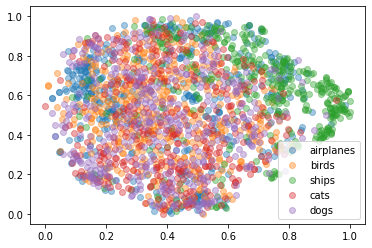

In [26]:
# get x and y coordinates
tx = outputs_embedded[:,0]
ty = outputs_embedded[:,1]

tx -= np.min(tx)
ty -= np.min(ty)

tx /= np.max(tx)
ty /= np.max(ty)

# class labels for plot legend
classes = {1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}

# plot tsne features
plt.figure()
for i in range(5):
    plt.scatter(tx[labels==i], ty[labels==i], label=classes[i+1], alpha=0.4)
plt.legend()
plt.savefig('./plots/tsne_finetuned.pdf')

<Figure size 432x288 with 0 Axes>

###  `Bonus`

In [52]:
pass